
# Support Vector machine


In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

## Task-1: Exploratory Data Analysis (EDA)

In [171]:
data=pd.read_csv(r"c:\Users\karen\Downloads\mushroom.csv")
data

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [173]:
data.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [174]:
from sklearn.preprocessing import LabelEncoder

In [175]:
cat_cols=data.select_dtypes(include=['object']).columns

In [176]:
label=LabelEncoder()    

In [177]:
for col in cat_cols:
    if data[col].dtypes=='object':
        data[col]=label.fit_transform(data[col])

In [178]:
data

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,1037,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,309,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,282,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,820,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,4,2,0,1,4,0,1,1,3,...,0,1,1,2,6,0,1,1,5.877891,17.464145
1996,1160,4,2,5,1,5,0,2,1,9,...,0,2,1,7,8,2,5,1,6.500840,13.501957
1997,265,2,1,3,1,3,3,0,1,7,...,0,0,2,1,8,0,6,1,13.558064,11.270020
1998,411,0,3,7,0,7,2,0,1,6,...,1,3,1,0,1,5,6,1,11.092703,8.423199


In [179]:
if "Unnamed: 0" in data.columns:
    data = data.drop(columns=["Unnamed: 0"])

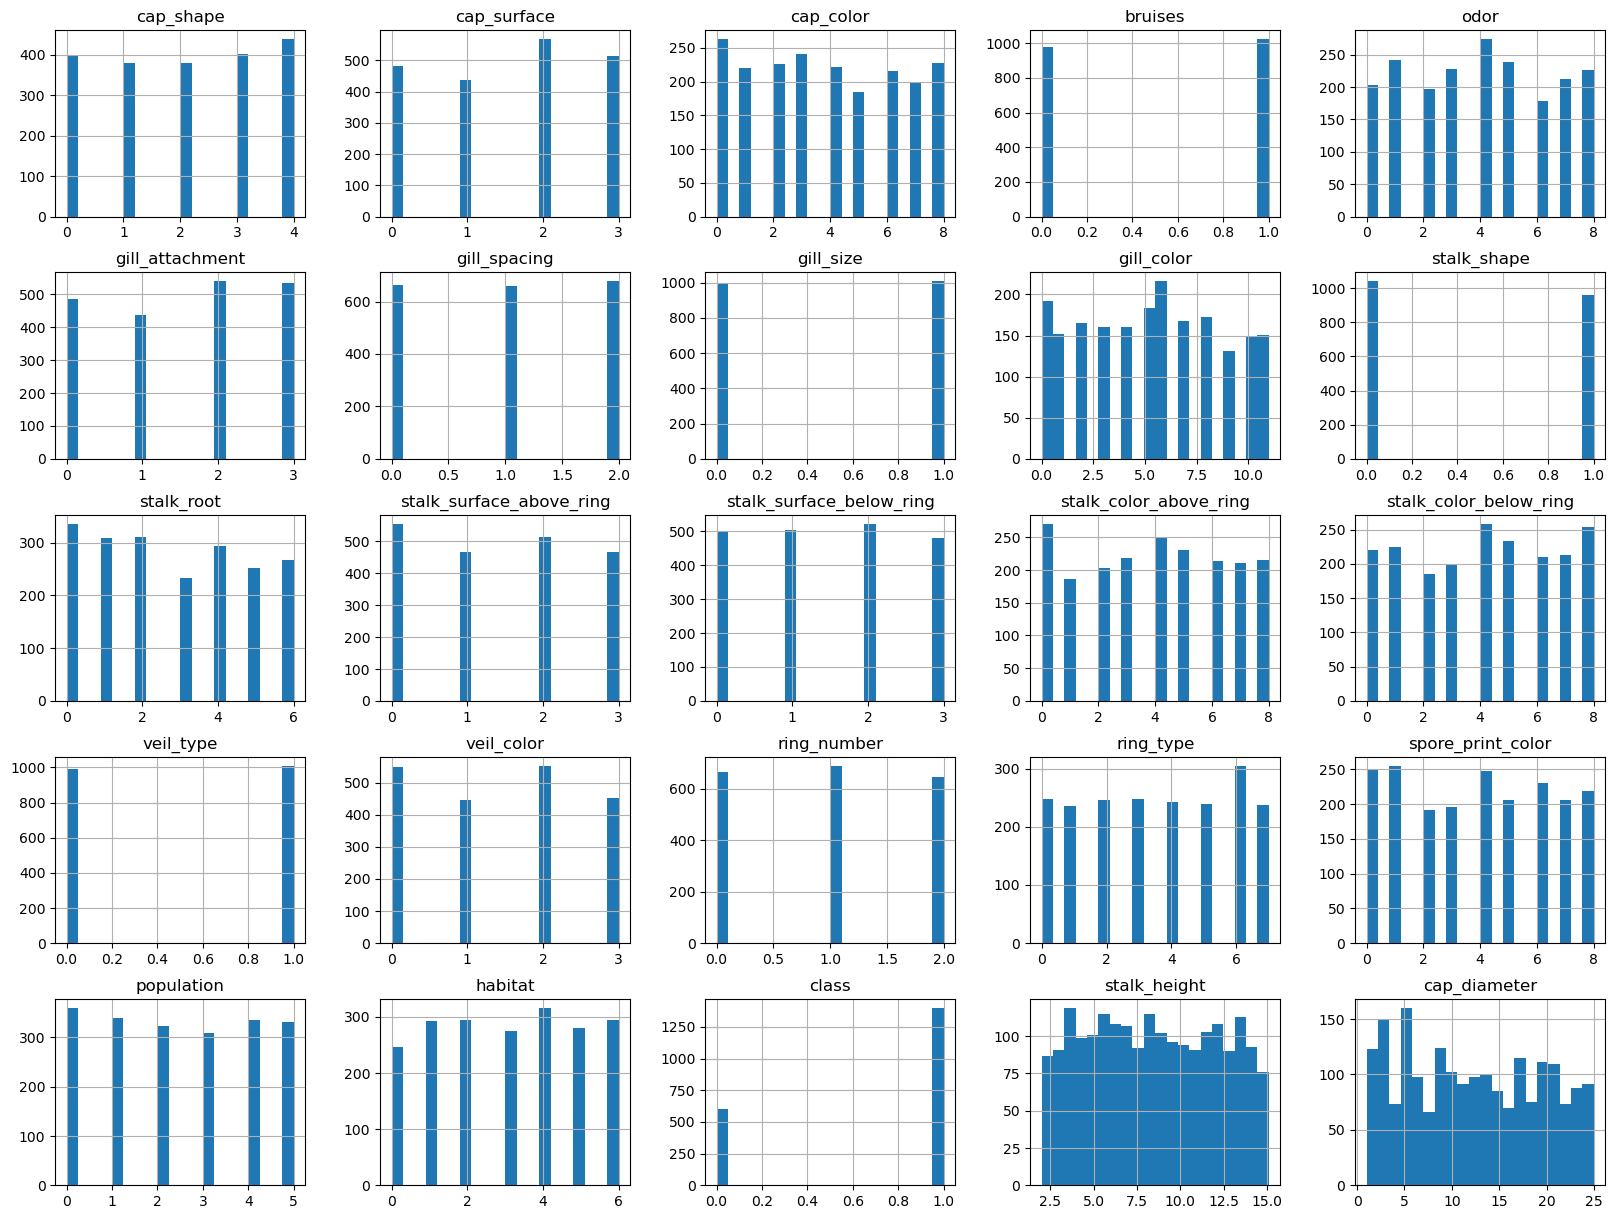

In [180]:
data.hist(bins=20,figsize=(20,15))
plt.show()

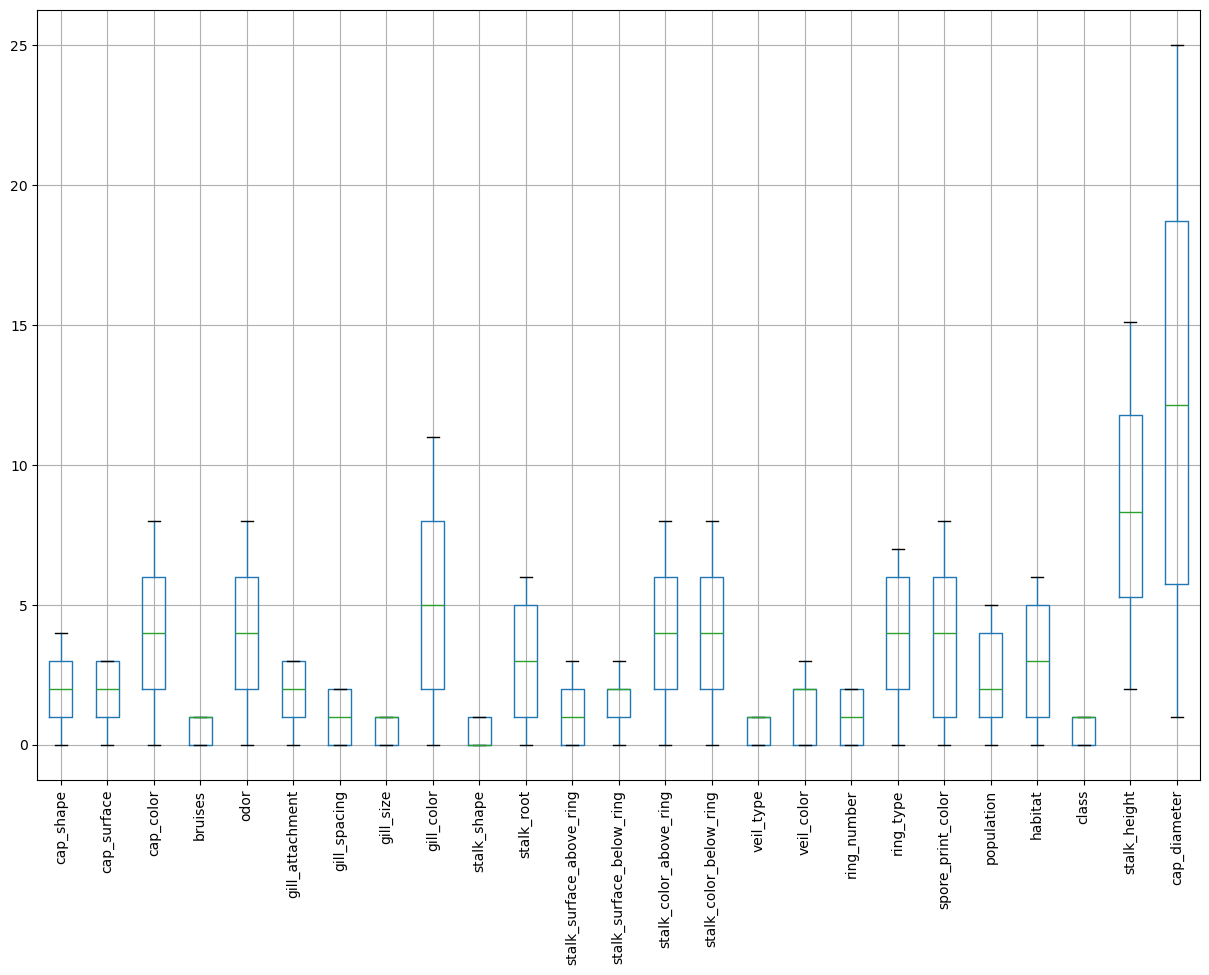

In [181]:
plt.figure(figsize=(15,10))
data.boxplot()
plt.xticks(rotation=90)
plt.show()

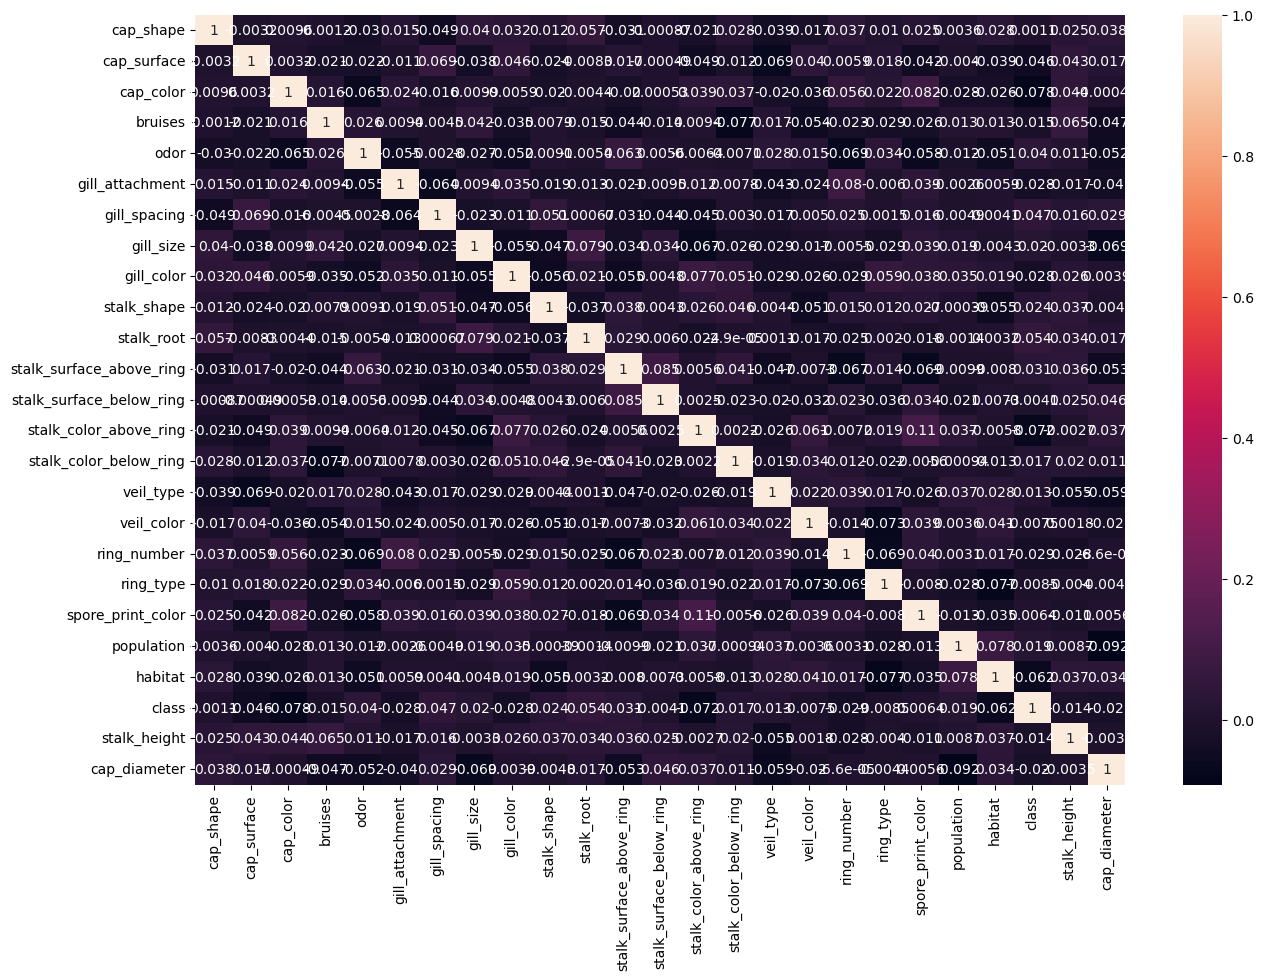

In [182]:
corr=data.corr()
plt.figure(figsize=(15,10)) 
sns.heatmap(corr,annot=True)
plt.show()

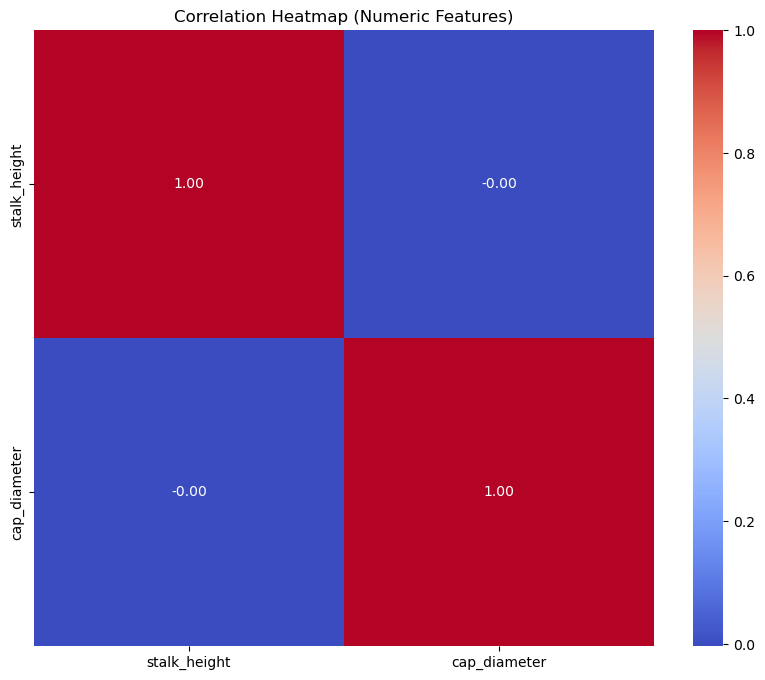

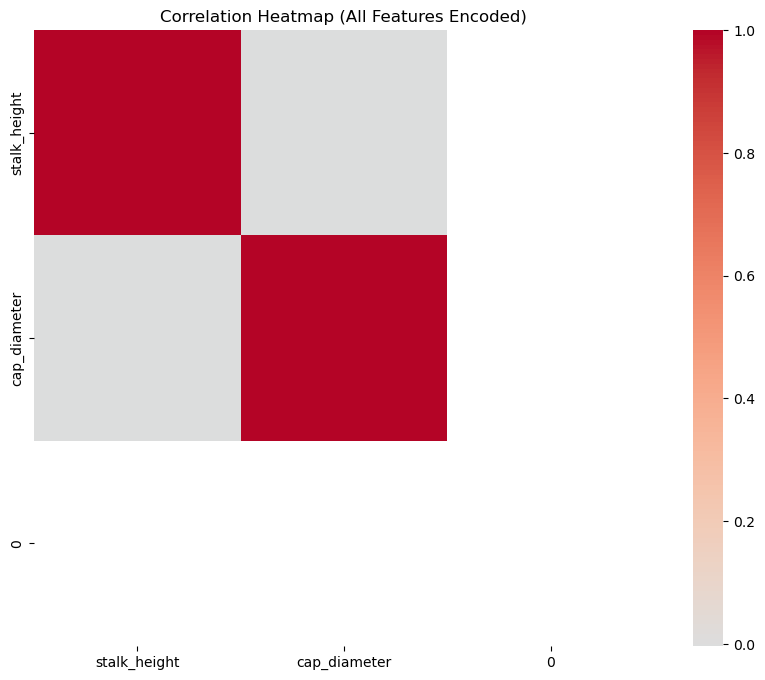

In [183]:
# --- 1. Correlation for numerical features ---
numeric_features = data.select_dtypes(include=["float64", "int64"])
plt.figure(figsize=(10,8))
sns.heatmap(numeric_features.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()
# --- 2. Encode categorical features ---
cat_features = data.select_dtypes(include=["object"]).apply(LabelEncoder().fit_transform)
# Merge numeric + encoded categorical
encoded_data = pd.concat([numeric_features, cat_features], axis=1)
#--- 3. Correlation heatmap for all features ---
plt.figure(figsize=(10,8))
sns.heatmap(encoded_data.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (All Features Encoded)")
plt.show()

## Task-2:Data Preprocessing

In [184]:
from sklearn.model_selection import train_test_split

In [185]:
features=data.drop('class',axis=1)

In [186]:
target=data['class']

In [187]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=42)

## Task 3: Data Visualization

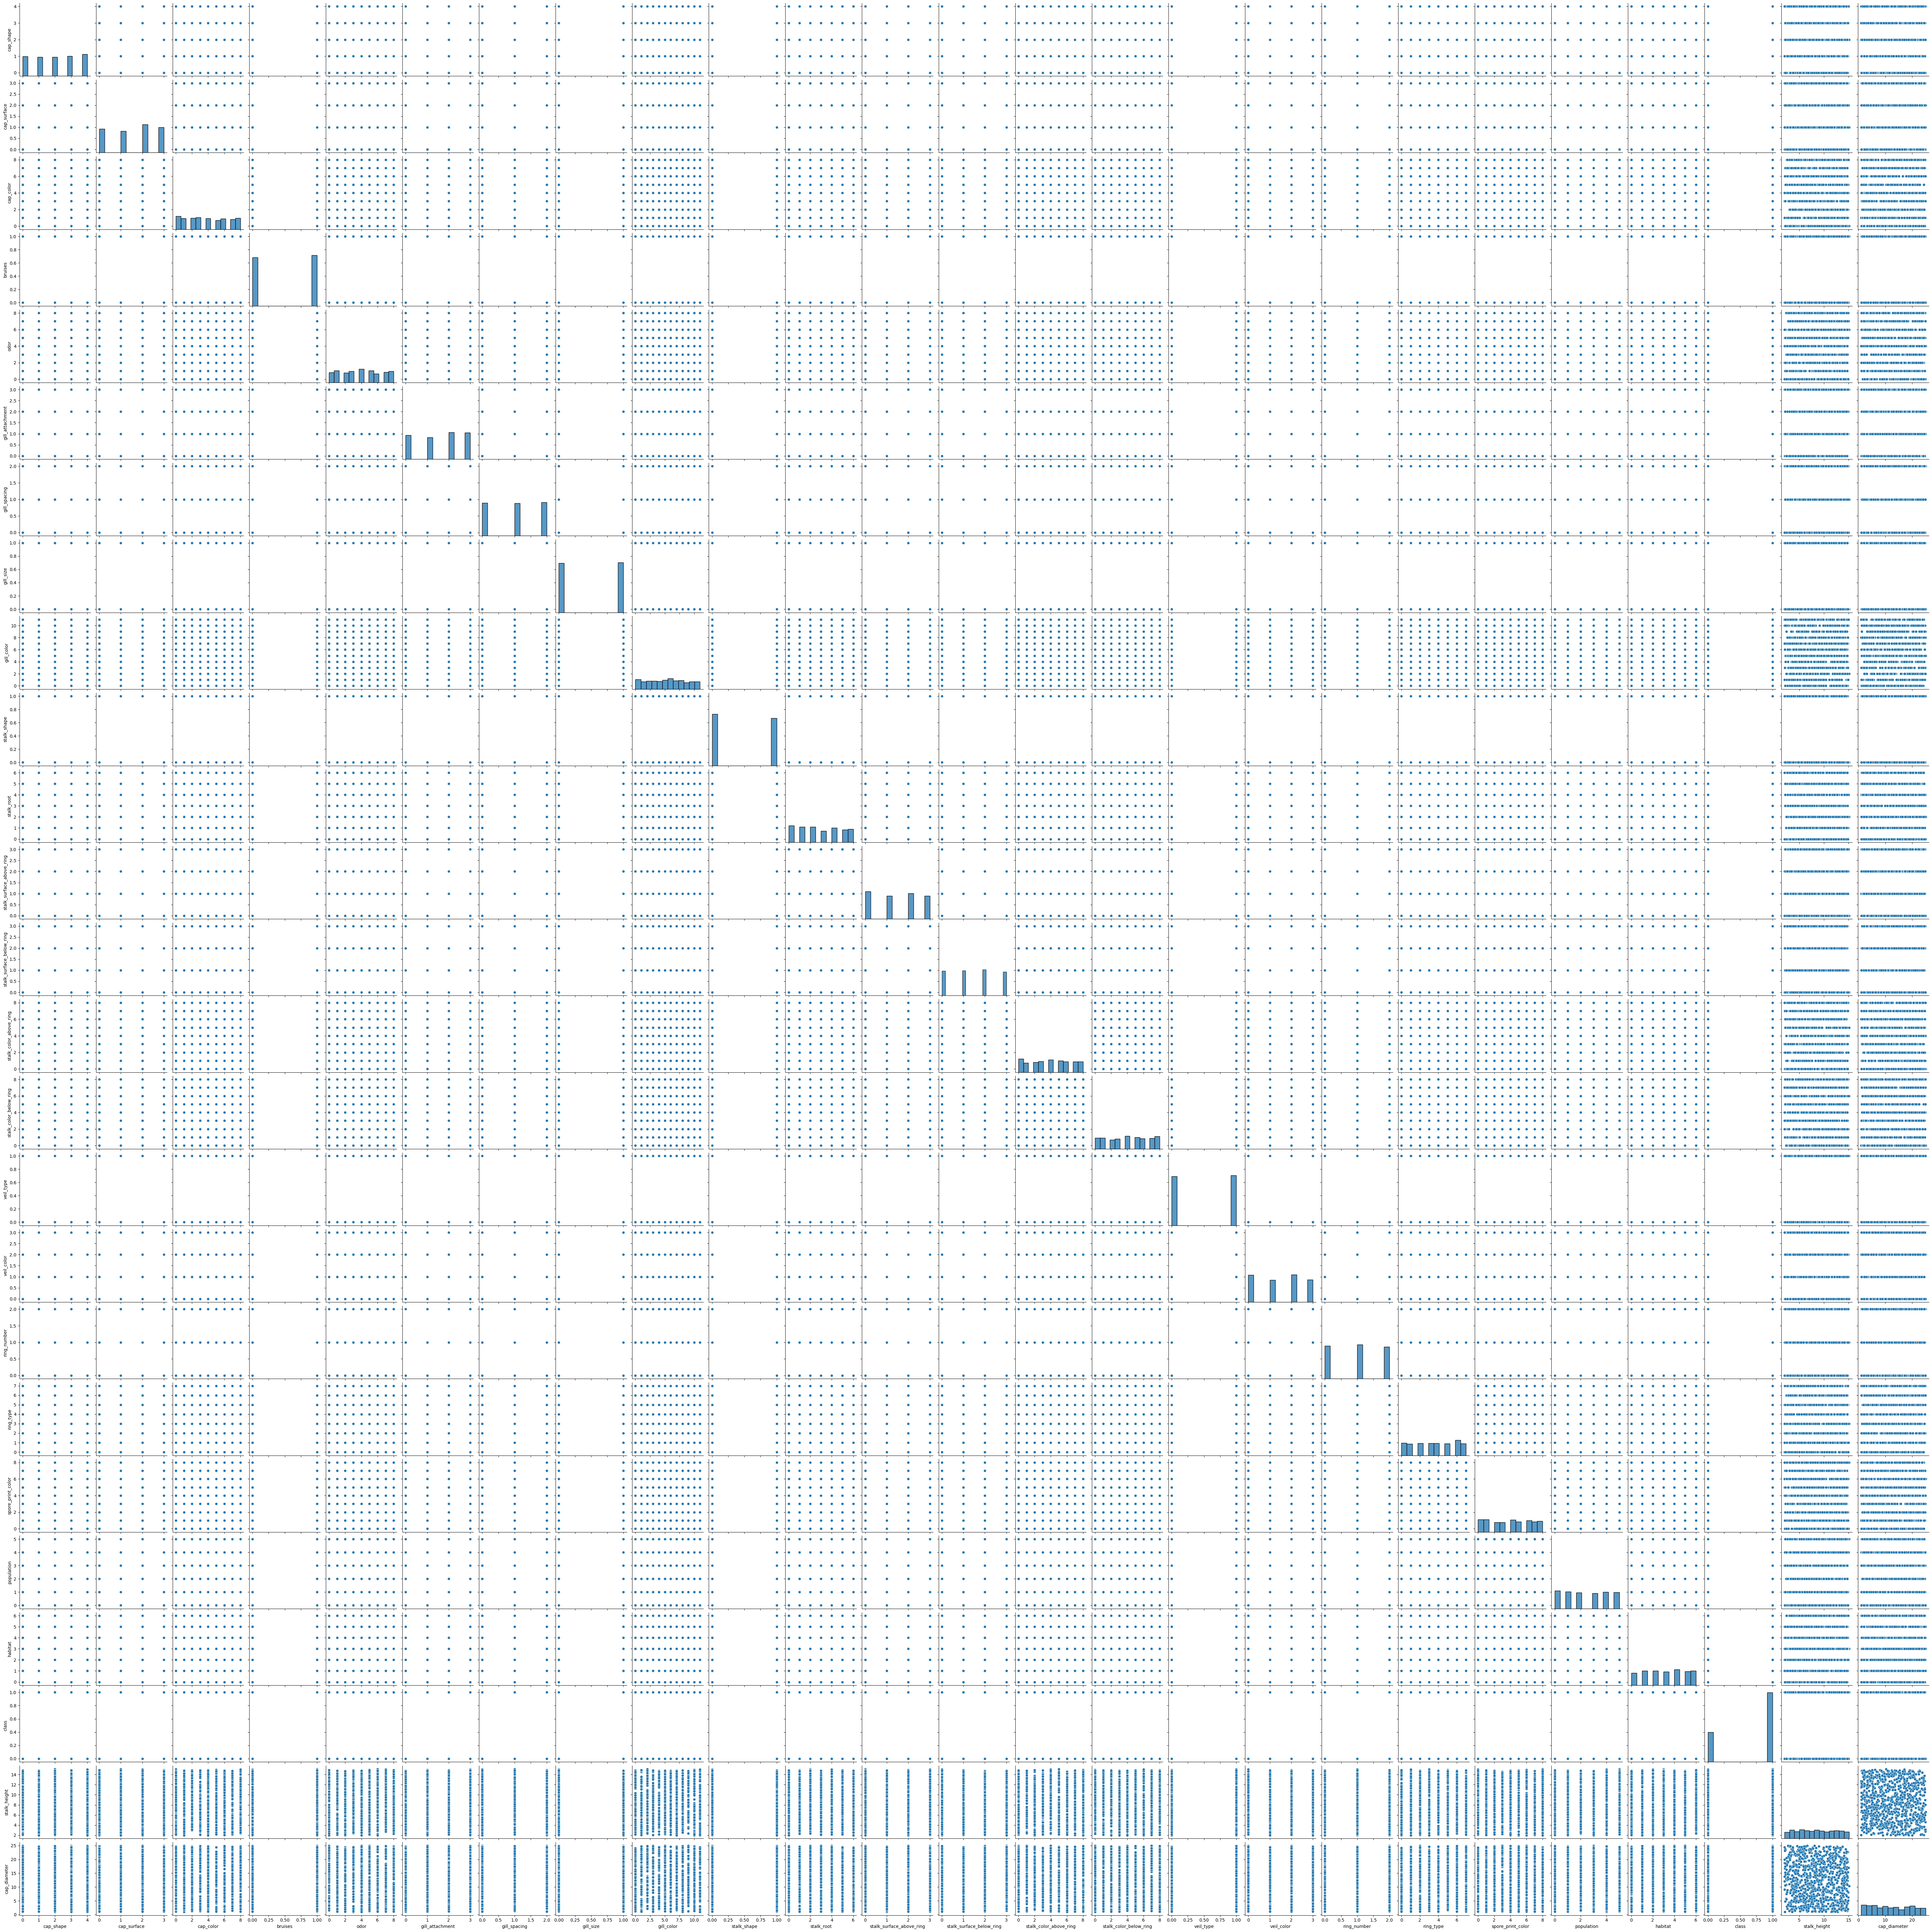

In [188]:
sns.pairplot(data)
plt.show()

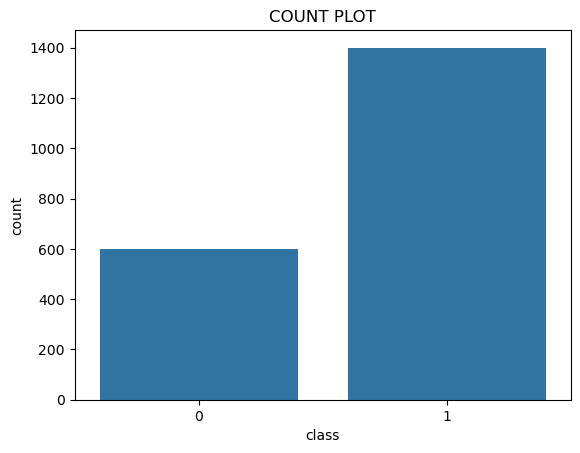

In [189]:
sns.countplot(x='class',data=data)
plt.title('COUNT PLOT')
plt.show()

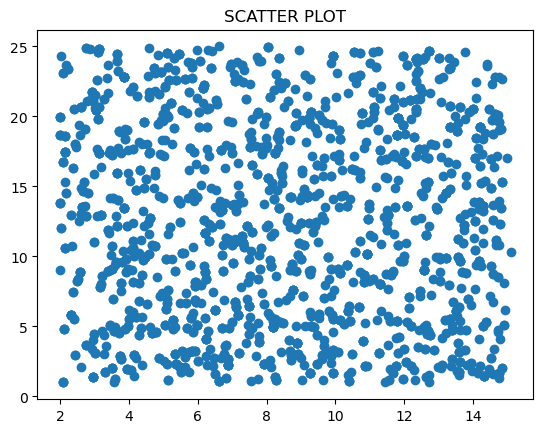

In [190]:
plt.scatter(data['stalk_height'],data['cap_diameter'])
plt.title('SCATTER PLOT')
plt.show()

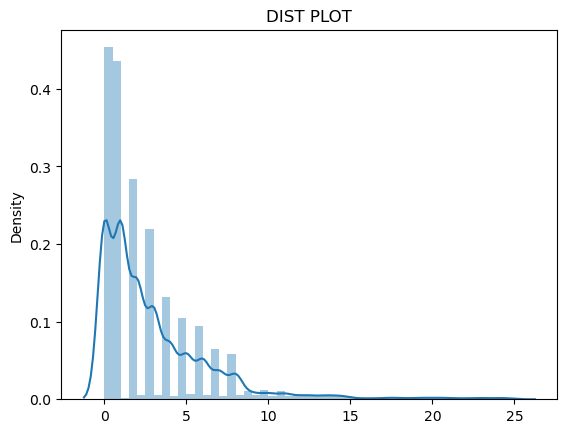

In [191]:
sns.distplot(features)
plt.title('DIST PLOT')
plt.show()

## Task 4: SVM Implementation

In [192]:
from sklearn import svm
from sklearn.svm import SVC

In [193]:
model1=SVC(kernel='linear')

In [194]:
model1.fit(x_train,y_train)

SVC(kernel='linear')

In [195]:
ypred=model1.predict(x_test)

In [196]:
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix

In [197]:
print('Accuracy:',accuracy_score(y_test,ypred)*100)

Accuracy: 69.16666666666667


In [198]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.69      1.00      0.82       415

    accuracy                           0.69       600
   macro avg       0.35      0.50      0.41       600
weighted avg       0.48      0.69      0.57       600



In [199]:
print('F1 score:',f1_score(y_test,ypred)*100)

F1 score: 81.77339901477832


In [200]:
from sklearn.model_selection import GridSearchCV

In [201]:
params={
    'kernel':['rbf'],
    'gamma':['scale'],
    'C':[0.1,4,5]
}

In [202]:
grid=GridSearchCV(estimator=model1,param_grid=params)

In [203]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 4, 5], 'gamma': ['scale'],
                         'kernel': ['rbf']})

In [204]:
grid.best_params_

{'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}

In [205]:
con=confusion_matrix(y_test,ypred)

In [206]:
# Step 2: Model Evaluation
y_pred = model1.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6916666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.69      1.00      0.82       415

    accuracy                           0.69       600
   macro avg       0.35      0.50      0.41       600
weighted avg       0.48      0.69      0.57       600



## Task 5: Visualization of SVM Results

<Axes: >

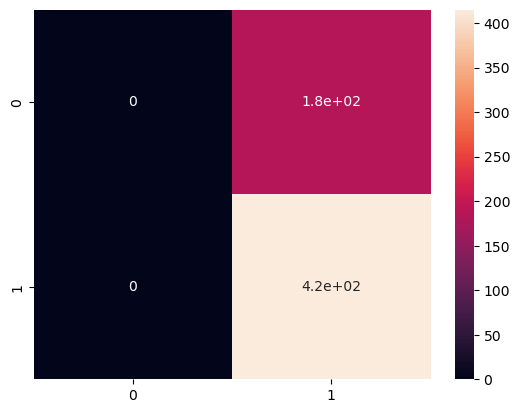

In [207]:
sns.heatmap(con,annot=True)

In [208]:
y_pred = model1.predict(x_test)

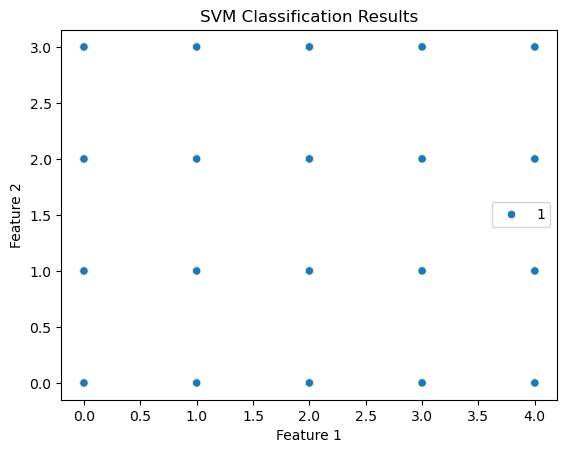

In [209]:
sns.scatterplot(x=x_test.iloc[:, 0], y=x_test.iloc[:, 1], hue=y_pred)
plt.title('SVM Classification Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Task 6: Parameter Tuning and Optimization

In [210]:
# Step 1: Experiment with different SVM hyperparameters
from sklearn.model_selection import GridSearchCV

## Task 7: Comparison and Analysis

In [211]:
svm_kernels = ['linear', 'poly', 'rbf']
for kernel in svm_kernels:
    svm_model = SVC(kernel=kernel)
    svm_model.fit(x_train, y_train)
    y_pred_kernel = model1.predict(x_test)
    accuracy_kernel = accuracy_score(y_test, y_pred_kernel)
    print("Kernel:", kernel)
    print("Accuracy:", accuracy_kernel)
    print("Classification Report:\n", classification_report(y_test, y_pred_kernel))
    print()

Kernel: linear
Accuracy: 0.6916666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.69      1.00      0.82       415

    accuracy                           0.69       600
   macro avg       0.35      0.50      0.41       600
weighted avg       0.48      0.69      0.57       600


Kernel: poly
Accuracy: 0.6916666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.69      1.00      0.82       415

    accuracy                           0.69       600
   macro avg       0.35      0.50      0.41       600
weighted avg       0.48      0.69      0.57       600


Kernel: rbf
Accuracy: 0.6916666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.69      1.00   